# Contents
01 Importing Libraries
02 Data Cleaning
03 Creating Scatterplot
04 Hypothesis
05 Creating Numpy Arrays
06 Creating Training and Test Data Sets
07 Linear Regression
08 Checking Model Performance
09 Discussion of Results

# 01 Importing Libraries

In [1]:
# Installing Scikit-learn
%pip install scikit-learn

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Shows visualizations automatically
%matplotlib inline

In [4]:
# Path
path = r'C:\Users\ckra9\Documents\CareerFoundry\World Happiness Rankings'

In [5]:
# Importing cleaned dataset
df_happiness = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Happiness_merge_all_years.csv'), index_col = False)

In [6]:
df_happiness.head()

,Unnamed: 0,Country,Region,Year,Happiness_rank,Happiness_score,GDP_capita,Family,Life_expectancy,Freedom,Gov_trust,Generosity,Dystopia_residual
0,0,Afghanistan,Southern Asia,2015,153,3.575,0.319820,0.302850,0.303350,0.23414,0.097190,0.365100,1.952100
1,158,Afghanistan,Southern Asia,2016,154,3.360,0.382270,0.110370,0.173440,0.16430,0.071120,0.312680,2.145580
2,315,Afghanistan,Southern Asia,2017,141,3.794,0.401477,0.581543,0.180747,0.10618,0.061158,0.311871,2.150801
3,470,Afghanistan,Southern Asia,2018,145,3.632,0.332000,0.537000,0.255000,0.08500,0.036000,0.191000,NaN
4,626,Afghanistan,Southern Asia,2019,154,3.203,0.350000,0.517000,0.361000,0.00000,0.025000,0.158000,NaN


# 02 Data Cleaning

In [7]:
# Dropping unnamed column
df_happy = df_happiness.drop('Unnamed: 0', axis = 1)

In [8]:
df_happy.head()

,Country,Region,Year,Happiness_rank,Happiness_score,GDP_capita,Family,Life_expectancy,Freedom,Gov_trust,Generosity,Dystopia_residual
0,Afghanistan,Southern Asia,2015,153,3.575,0.319820,0.302850,0.303350,0.23414,0.097190,0.365100,1.952100
1,Afghanistan,Southern Asia,2016,154,3.360,0.382270,0.110370,0.173440,0.16430,0.071120,0.312680,2.145580
2,Afghanistan,Southern Asia,2017,141,3.794,0.401477,0.581543,0.180747,0.10618,0.061158,0.311871,2.150801
3,Afghanistan,Southern Asia,2018,145,3.632,0.332000,0.537000,0.255000,0.08500,0.036000,0.191000,NaN
4,Afghanistan,Southern Asia,2019,154,3.203,0.350000,0.517000,0.361000,0.00000,0.025000,0.158000,NaN


In [9]:
df_happy.shape

(782, 12)

In [10]:
# missing values check
df_happy.isnull().sum()

Country                0
Region                 0
Year                   0
Happiness_rank         0
Happiness_score        0
GDP_capita             0
Family                 0
Life_expectancy        0
Freedom                0
Gov_trust              1
Generosity             0
Dystopia_residual    312
dtype: int64

In [11]:
# duplicates check
dups = df_happy.duplicated()

In [12]:
dups.shape

(782,)

In [13]:
# General descriptive statistics
df_happy.describe()

,Year,Happiness_rank,Happiness_score,GDP_capita,Family,Life_expectancy,Freedom,Gov_trust,Generosity,Dystopia_residual
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,781.000000,782.000000,470.000000
mean,2016.993606,78.698210,5.379018,0.916047,1.078392,0.612416,0.411091,0.125436,0.218576,2.092717
std,1.417364,45.182384,1.127456,0.407340,0.329548,0.248309,0.152880,0.105816,0.122321,0.565772
min,2015.000000,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,2016.000000,40.000000,4.509750,0.606500,0.869363,0.440183,0.309768,0.054000,0.130000,1.737975
50%,2017.000000,79.000000,5.322000,0.982205,1.124735,0.647310,0.431000,0.091000,0.201982,2.094640
75%,2018.000000,118.000000,6.189500,1.236187,1.327250,0.808000,0.531000,0.156030,0.278832,2.455575
max,2019.000000,158.000000,7.769000,2.096000,1.644000,1.141000,0.724000,0.551910,0.838075,3.837720


In [14]:
df_happy.columns

Index(['Country', 'Region', 'Year', 'Happiness_rank', 'Happiness_score',
       'GDP_capita', 'Family', 'Life_expectancy', 'Freedom', 'Gov_trust',
       'Generosity', 'Dystopia_residual'],
      dtype='object')

# 03 Creating Scatterplot

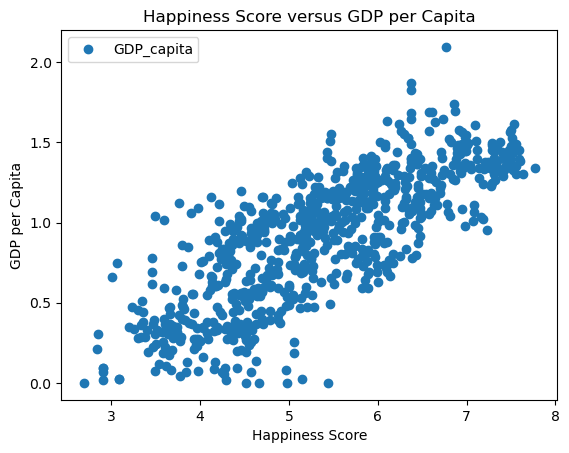

In [15]:
# Create a scatterplot to compare GDP per capita to happiness scores

df_happy.plot(x = 'Happiness_score', y='GDP_capita',style='o')
plt.title('Happiness Score versus GDP per Capita')  
plt.xlabel('Happiness Score')  
plt.ylabel('GDP per Capita')  
plt.show()

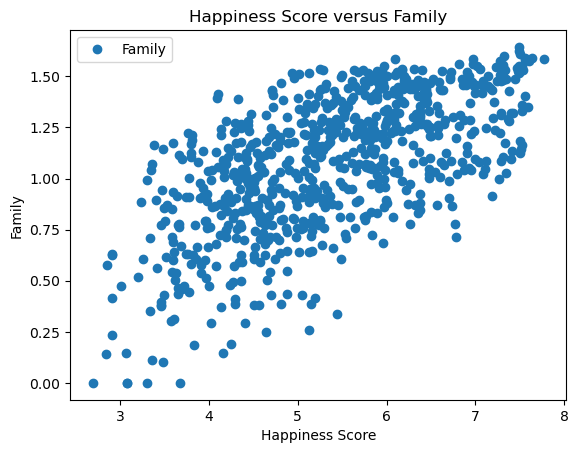

In [16]:
# Create a scatterplot to compare Family to happiness scores

df_happy.plot(x = 'Happiness_score', y='Family',style='o')
plt.title('Happiness Score versus Family')  
plt.xlabel('Happiness Score')  
plt.ylabel('Family')  
plt.show()

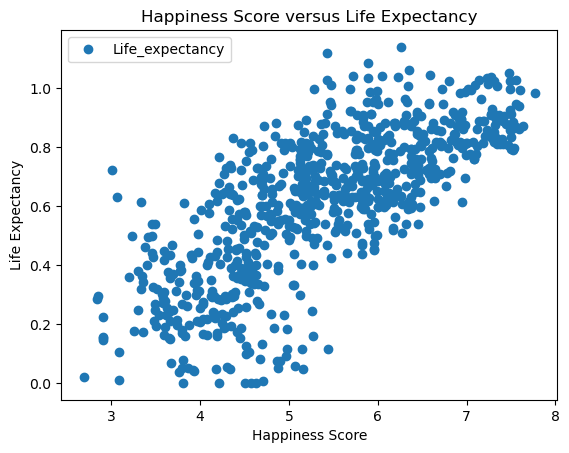

In [17]:
# Create a scatterplot to compare life expectancy to happiness scores

df_happy.plot(x = 'Happiness_score', y='Life_expectancy',style='o')
plt.title('Happiness Score versus Life Expectancy')  
plt.xlabel('Happiness Score')  
plt.ylabel('Life Expectancy')  
plt.show()

# 04 Hypothesis


If the variable GDP per capita scores high, then the pearson r value will show a strong correlation between happiness score and GDP per capita. 

# 05 Creating Numpy Arrays

In [23]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_happy['GDP_capita'].values.reshape(-1,1)
Y = df_happy['Happiness_score'].values.reshape(-1,1)

In [24]:
X

array([[0.31982   ],
       [0.38227   ],
       [0.40147722],
       [0.332     ],
       [0.35      ],
       [0.87867   ],
       [0.9553    ],
       [0.99619275],
       [0.916     ],
       [0.947     ],
       [0.93929   ],
       [1.05266   ],
       [1.09186447],
       [0.979     ],
       [1.002     ],
       [0.75778   ],
       [0.84731   ],
       [0.85842818],
       [0.73      ],
       [1.05351   ],
       [1.15137   ],
       [1.18529546],
       [1.073     ],
       [1.092     ],
       [0.76821   ],
       [0.86086   ],
       [0.90059674],
       [0.816     ],
       [0.85      ],
       [1.33358   ],
       [1.44443   ],
       [1.48441493],
       [1.34      ],
       [1.372     ],
       [1.33723   ],
       [1.45038   ],
       [1.48709726],
       [1.341     ],
       [1.376     ],
       [1.02389   ],
       [1.12373   ],
       [1.15360177],
       [1.024     ],
       [1.043     ],
       [1.32376   ],
       [1.44024   ],
       [1.48841226],
       [1.338

In [25]:
Y

array([[3.575     ],
       [3.36      ],
       [3.79399991],
       [3.632     ],
       [3.203     ],
       [4.959     ],
       [4.655     ],
       [4.64400005],
       [4.586     ],
       [4.719     ],
       [5.605     ],
       [6.355     ],
       [5.87200022],
       [5.295     ],
       [5.211     ],
       [4.033     ],
       [3.866     ],
       [3.79500008],
       [3.795     ],
       [6.574     ],
       [6.65      ],
       [6.59899998],
       [6.388     ],
       [6.086     ],
       [4.35      ],
       [4.36      ],
       [4.37599993],
       [4.321     ],
       [4.559     ],
       [7.284     ],
       [7.313     ],
       [7.28399992],
       [7.272     ],
       [7.228     ],
       [7.2       ],
       [7.119     ],
       [7.00600004],
       [7.139     ],
       [7.246     ],
       [5.212     ],
       [5.291     ],
       [5.23400021],
       [5.201     ],
       [5.208     ],
       [5.96      ],
       [6.218     ],
       [6.08699989],
       [6.105

# 06 Creating Training and Test Data Sets

In [26]:
# Split data into a training set and a test set.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# 07 Linear Regression

In [27]:
# Creating a regression object to be fit onto the training set.

regression = LinearRegression()  

In [28]:
# Fit the regression object onto the training set.

regression.fit(X_train, Y_train)

LinearRegression()

In [29]:
# Predict the values of Y using X.

Y_predicted = regression.predict(X_test)

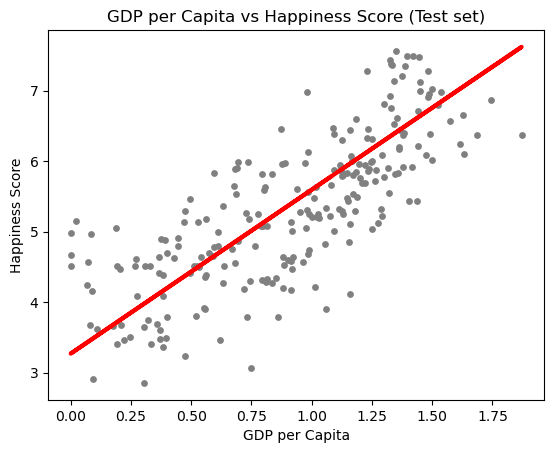

In [30]:
# Create a plot that shows the regression line on the test set.

plot_test = plt
plot_test.scatter(X_test, Y_test, color='gray', s = 15)
plot_test.plot(X_test, Y_predicted, color='red', linewidth =3)
plot_test.title('GDP per Capita vs Happiness Score (Test set)')
plot_test.xlabel('GDP per Capita')
plot_test.ylabel('Happiness Score')
plot_test.show()

The regression line shows the general trend of a higher GDP meaning a higher happiness score. However, there are outliers that fall a good distance away from the regression line. I think this still shows a fairly strong correlation, but not as strong as I initially expected. 

# 08 Checking Model Performance

In [31]:
# Creating objects that contain the model summary statistics to check model performance.

rmse = mean_squared_error(Y_test, Y_predicted)
r2 = r2_score(Y_test, Y_predicted)  

In [32]:
# Print the model summary statistics.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.3254095]]
Mean squared error:  0.49055063829741263
R2 score:  0.5519668640598252


In [33]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': Y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,5.225,5.768438
1,4.793,4.306389
2,4.419,4.116752
3,5.211,5.598712
4,5.191,5.661498
5,3.410,3.712805
6,5.987,4.979944
7,5.227,6.267238
8,5.546,6.334867
9,4.121,5.962662


# 09 Discussion of Results

The r value indicates a positive correlation between GDP per capita and the happiness score, but not necessarily strong. I think after looking at the predicted vs actual y values that the model did not preform very accurately. In a previous exercise using a matrix heatmap I found the correlation r value to be 0.79 between GDP per capita and the happiness score. The 0.55 r value is quite low compared to the actual.  